In [285]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import re
import chardet

In [286]:
imdea_ip_proto = pd.read_csv('nmap_dataset/imdea_ip_proto_scan_all_protocol.csv')
imdea_tcp = pd.read_csv('nmap_dataset/imdea_tcp_scan_all_ports.csv')
imdea_udp = pd.read_csv('nmap_dataset/imdea_udp_scan_popular_ports.csv')
devices = pd.read_csv('nmap_dataset/devices.csv')

In [287]:
imdea_ip_proto['version.1'] = imdea_ip_proto['version.1'].replace('unknown', 'cannot collect')

In [288]:
devices.rename(columns={'IPv4': 'ip_addr'}, inplace=True)

In [289]:
devices

,Device,MAC address,ip_addr
0,RPI (br0),92:75:E8:51:95:5C,192.168.4.1
1,Lab controller device,5C:26:0A:12:9C:2C,192.168.4.27
2,Aniketh’s MBP,74:8F:3C:C1:62:D3,192.168.4.40
3,Hue Bridge,EC:B5:FA:94:A5:4E,192.168.4.174
4,Ring hub,B0:09:DA:6F:F0:39,192.168.4.196
5,Nest hub,AC:67:84:1F:B1:4D,192.168.4.179
6,Fire TV,40:A9:CF:7E:5C:C4,192.168.4.91
7,Roku TV,84:EA:ED:57:A2:32,192.168.4.166
8,Pixel 6A,E6:C4:1A:74:A6:F0,192.168.4.36
9,Echo Dot,48:78:5E:49:DF:81,192.168.4.122


In [290]:
imdea_ip_proto

,scanner,args,start_time,start_time_str,version,xmloutputversion,verbose,hosts_up,hosts_down,hosts_total,ip_addr,mac_addr,vendor,protocol,port_id,state,reason,service,version.1
0,nmap,nmap -oX - -sO -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 -v nmap 192.168.4.0/24,1680169478,Thu Mar 30 11:44:38 2023,unknown,1.04,1,"('9',)","('246',)",255,192.168.4.42,28:6D:97:70:DB:DD,Samjin,ip,1,open,proto-unreach,icmp,cannot collect
1,nmap,nmap -oX - -sO -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 -v nmap 192.168.4.0/24,1680169478,Thu Mar 30 11:44:38 2023,unknown,1.04,1,"('9',)","('246',)",255,192.168.4.42,28:6D:97:70:DB:DD,Samjin,ip,6,open,proto-response,tcp,cannot collect
2,nmap,nmap -oX - -sO -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 -v nmap 192.168.4.0/24,1680169478,Thu Mar 30 11:44:38 2023,unknown,1.04,1,"('9',)","('246',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,ip,1,open,proto-unreach,icmp,cannot collect
3,nmap,nmap -oX - -sO -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 -v nmap 192.168.4.0/24,1680169478,Thu Mar 30 11:44:38 2023,unknown,1.04,1,"('9',)","('246',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,ip,6,open,proto-response,tcp,cannot collect
4,nmap,nmap -oX - -sO -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 -v nmap 192.168.4.0/24,1680169478,Thu Mar 30 11:44:38 2023,unknown,1.04,1,"('9',)","('246',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,ip,17,open,port-unreach,udp,cannot collect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,nmap,nmap -oX - -sO -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 -v nmap 192.168.4.0/24,1680169478,Thu Mar 30 11:44:38 2023,unknown,1.04,1,"('9',)","('246',)",255,192.168.4.27,NaN,NaN,ip,17,open,port-unreach,udp,cannot collect
254,nmap,nmap -oX - -sO -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 -v nmap 192.168.4.0/24,1680169478,Thu Mar 30 11:44:38 2023,unknown,1.04,1,"('9',)","('246',)",255,192.168.4.27,NaN,NaN,ip,103,open,proto-response,pim,cannot collect
255,nmap,nmap -oX - -sO -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 -v nmap 192.168.4.0/24,1680169478,Thu Mar 30 11:44:38 2023,unknown,1.04,1,"('9',)","('246',)",255,192.168.4.27,NaN,NaN,ip,136,open,proto-response,udplite,cannot collect
256,nmap,nmap -oX - -sO -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 -v nmap 192.168.4.0/24,1680169478,Thu Mar 30 11:44:38 2023,unknown,1.04,1,"('9',)","('246',)",255,192.168.4.27,NaN,NaN,ip,235,open,proto-response,unknown,cannot collect


In [291]:
df3 = imdea_tcp.append(imdea_udp, ignore_index=True)
df_nmap = df3.append(imdea_ip_proto, ignore_index=True)

In [292]:
df_nmap = df_nmap.merge(devices[['Device', 'ip_addr']], on='ip_addr', how='left')

In [294]:
df_nmap

,scanner,args,start_time,start_time_str,version,xmloutputversion,verbose,hosts_up,hosts_down,hosts_total,ip_addr,mac_addr,vendor,protocol,port_id,state,reason,service,version.1,Device
0,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 nmap 192.168.4.0/24,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,5555,open,syn-ack,freeciv,unknown,Fire TV
1,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 nmap 192.168.4.0/24,1680109231,Wed Mar 29 19:00:31 2023,Amazon Whisperplay DIAL REST service unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,8009,open,syn-ack,http,Amazon Whisperplay DIAL REST service unknown,Fire TV
2,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 nmap 192.168.4.0/24,1680109231,Wed Mar 29 19:00:31 2023,Amazon FireTV Stick unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,34511,open,syn-ack,http,Amazon FireTV Stick unknown,Fire TV
3,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 nmap 192.168.4.0/24,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,35146,open,syn-ack,tcpwrapped,unknown,Fire TV
4,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 nmap 192.168.4.0/24,1680109231,Wed Mar 29 19:00:31 2023,Nagios NSCA unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,55442,open,syn-ack,nagios-nsca,Nagios NSCA unknown,Fire TV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,nmap,nmap -oX - -sO -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 -v nmap 192.168.4.0/24,1680169478,Thu Mar 30 11:44:38 2023,unknown,1.04,1,"('9',)","('246',)",255,192.168.4.27,NaN,NaN,ip,17,open,port-unreach,udp,cannot collect,Lab controller device
339,nmap,nmap -oX - -sO -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 -v nmap 192.168.4.0/24,1680169478,Thu Mar 30 11:44:38 2023,unknown,1.04,1,"('9',)","('246',)",255,192.168.4.27,NaN,NaN,ip,103,open,proto-response,pim,cannot collect,Lab controller device
340,nmap,nmap -oX - -sO -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 -v nmap 192.168.4.0/24,1680169478,Thu Mar 30 11:44:38 2023,unknown,1.04,1,"('9',)","('246',)",255,192.168.4.27,NaN,NaN,ip,136,open,proto-response,udplite,cannot collect,Lab controller device
341,nmap,nmap -oX - -sO -T4 --reason --exclude 192.168.4.27 --exclude 192.168.4.1 --exclude 192.168.4.2 -v nmap 192.168.4.0/24,1680169478,Thu Mar 30 11:44:38 2023,unknown,1.04,1,"('9',)","('246',)",255,192.168.4.27,NaN,NaN,ip,235,open,proto-response,unknown,cannot collect,Lab controller device


## Unused port analysis 

In [275]:
DEC_parsed = "/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec"

df_list = []

for csv_file in glob.glob(os.path.join(DEC_parsed, "*.csv")):
    split_path = re.split(r'(-\d{4}-\d{2}-\d{2})', csv_file)
    device_name = split_path[0].replace('/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/', '')
    print(csv_file, device_name)
    with open(csv_file, 'rb') as f:
        result = chardet.detect(f.read())
        encoding = result['encoding']

    df = pd.read_csv(csv_file, encoding=encoding, on_bad_lines='skip')
    df['device_name'] = device_name
    df['file_path'] = csv_file

    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
df_ndpi = pd.concat(df_list, ignore_index=True)

/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv nest-camera
/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/ring-chime1-2022-12-27_15.15.24_192.168.10.215.csv ring-chime1
/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/echodot-2022-12-23_16.01.10_192.168.10.205.csv echodot
/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/ubell-doorbell-2022-12-23_17.56.10_192.168.10.167.csv ubell-doorbell
/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/echoshow8-2022-12-27_14.50.18_192.168.10.123.csv echoshow8
/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/echodot3c-2022-12-25_09.34.09_192.168.10.238.csv echodot3c
/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/lefun-cam-wired-2022-12-25_16.00.54_192.168.10.217.csv lefun-cam-

In [278]:
def analyze_unused_ports(ip, pcap_df, nmap_df):
    # Filter traffic and nmap data for the specific IP address
    device_traffic = pcap_df[(pcap_df['src_ip'] == ip) | (pcap_df['src_ip'] == ip)]
    device_nmap = nmap_df[nmap_df['ip_addr'] == ip]

    # Extract source and destination ports from the device traffic
    src_ports = set(device_traffic['src_port'].unique())
    dst_ports = set(device_traffic['dst_port'].unique())

    # Combine both source and destination ports
    all_used_ports = src_ports.union(dst_ports)

    # Extract open ports found by nmap for the device
    nmap_open_ports = set(device_nmap['port_id'].unique())

    # Find open ports that are unused as per the pcap data
    unused_ports = nmap_open_ports.difference(all_used_ports)

    return unused_ports

In [295]:
df_ndpi

,#flow_id,protocol,first_seen,last_seen,duration,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,...,advertised_alpns,negotiated_alpn,tls_supported_versions,ssh_client_hassh,ssh_server_hassh,flow_info,plen_bins,http_user_agent,device_name,file_path
0,65,58.0,1.672269e+09,1.672269e+09,0.0,::,0,ff02::1:ff08:97c5,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
1,138,58.0,1.672276e+09,1.672276e+09,0.0,::,0,ff02::1:fffb:edc8,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
2,68,58.0,1.672269e+09,1.672269e+09,0.0,::,0,ff02::1:ffb3:dbd0,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
3,107,17.0,1.672273e+09,1.672273e+09,0.001,192.168.10.153,35211,192.168.10.193,10006,78,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
4,69,58.0,1.672269e+09,1.672269e+09,0.0,::,0,ff02::1:ffc8:ffd7,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504298,42,58.0,1.671857e+09,1.671861e+09,4278.682,fe80::8ec:5d6d:6721:ba9b,0,ff02::1:ff40:e394,0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,homepod,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/homepod-2022-12-23_02.48.39_192.168.10.107.csv
504299,51,58.0,1.671867e+09,1.671867e+09,4.838,fe80::3198:2512:1a6a:998,0,fe80::8ec:5d6d:6721:ba9b,0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,homepod,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/homepod-2022-12-23_02.48.39_192.168.10.107.csv
504300,47,6.0,1.671865e+09,1.671865e+09,0.092,192.168.10.207,63740,192.168.10.107,50102,91.0,...,http/1.1,NaN,GREASE;TLSv1.3;TLSv1.2;TLSv1.1;TLSv1,NaN,NaN,NaN,0;50;0;0;0;0;0;0;0;50;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,homepod,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/homepod-2022-12-23_02.48.39_192.168.10.107.csv
504301,48,6.0,1.671865e+09,1.671865e+09,31.098,192.168.10.207,63742,192.168.10.107,50102,91.0,...,http/1.1,NaN,GREASE;TLSv1.3;TLSv1.2;TLSv1.1;TLSv1,NaN,NaN,NaN,40;40;0;0;0;0;20;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,homepod,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/homepod-2022-12-23_02.48.39_192.168.10.107.csv


In [279]:
unique_ips = df_ndpi['src_ip'].unique()

In [297]:
unused_ports_dict = {}
for ip in unique_ips:
    unused_ports = analyze_unused_ports(ip, df_ndpi, df_nmap)
    unused_ports_dict[ip] = unused_ports

In [298]:
unused_ports_dict

{'::': set(),
 '192.168.10.153': set(),
 '192.168.10.193': set(),
 '192.168.10.228': set(),
 '192.168.10.180': set(),
 '192.168.10.117': set(),
 '192.168.10.239': set(),
 '192.168.10.154': set(),
 'fe80::1e53:f9ff:fe3d:72b': set(),
 '0.0.0.0': set(),
 '192.168.10.102': set(),
 'fe80::d7:9815:30c0:9d72': set(),
 'fe80::1808:81f5:8269:9fd6': set(),
 '192.168.10.163': set(),
 '192.168.10.215': set(),
 '192.168.10.254': set(),
 '192.168.10.250': set(),
 '192.168.10.205': set(),
 '192.168.10.148': set(),
 '192.168.10.176': set(),
 '192.168.10.123': set(),
 '192.168.10.249': set(),
 '192.168.10.198': set(),
 '192.168.10.240': set(),
 '192.168.10.118': set(),
 '192.168.10.201': set(),
 '192.168.10.238': set(),
 '192.168.10.100': set(),
 '192.168.10.136': set(),
 '192.168.10.236': set(),
 '192.168.10.106': set(),
 '192.168.10.196': set(),
 '192.168.10.171': set(),
 '192.168.10.226': set(),
 '192.168.10.182': set(),
 '192.168.10.223': set(),
 '192.168.10.164': set(),
 '192.168.10.189': set(),
 

In [277]:
df_ndpi[df_ndpi['dst_ip'] == '::']

,#flow_id,protocol,first_seen,last_seen,duration,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,...,advertised_alpns,negotiated_alpn,tls_supported_versions,ssh_client_hassh,ssh_server_hassh,flow_info,plen_bins,http_user_agent,device_name,file_path
101095,12,58.0,1.672261e+09,1.672274e+09,13040.988,fdc0:b053:41e6:428a:888c:95ff:edf3:83e9,0,::,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,facebook-portal-mini,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/facebook-portal-mini-2022-12-28_15.10.14_192.168.10.178.csv
101102,18,58.0,1.672273e+09,1.672273e+09,0.0,fd56:c3e9:3d0c:a3af:9c12:1b13:1769:8f8a,0,::,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,facebook-portal-mini,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/facebook-portal-mini-2022-12-28_15.10.14_192.168.10.178.csv
101108,15,58.0,1.672265e+09,1.672273e+09,7855.707,fd56:c3e9:3d0c:a3af:24b8:2266:6a56:8aef,0,::,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,facebook-portal-mini,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/facebook-portal-mini-2022-12-28_15.10.14_192.168.10.178.csv
129848,27,58.0,1.672038e+09,1.672038e+09,0.0,fdc0:b053:41e6:428a:55ba:ae29:676e:f6ba,0,::,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,facebook-portal-mini,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/facebook-portal-mini-2022-12-25_15.10.09_192.168.10.178.csv
129849,17,58.0,1.672020e+09,1.672079e+09,59112.833,fdc0:b053:41e6:428a:888c:95ff:edf3:83e9,0,::,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,facebook-portal-mini,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/facebook-portal-mini-2022-12-25_15.10.09_192.168.10.178.csv
129855,32,58.0,1.672052e+09,1.672062e+09,10166.374,fdc0:b053:41e6:428a:a810:b7bf:70a:c777,0,::,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,facebook-portal-mini,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/facebook-portal-mini-2022-12-25_15.10.09_192.168.10.178.csv
129869,25,58.0,1.672033e+09,1.672033e+09,0.0,fd56:c3e9:3d0c:a3af:f504:620c:36bf:6ffc,0,::,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,facebook-portal-mini,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/facebook-portal-mini-2022-12-25_15.10.09_192.168.10.178.csv
129872,30,58.0,1.672047e+09,1.672047e+09,0.0,fd56:c3e9:3d0c:a3af:9d40:aca5:9377:9bad,0,::,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,facebook-portal-mini,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/facebook-portal-mini-2022-12-25_15.10.09_192.168.10.178.csv
129873,13,58.0,1.672004e+09,1.672084e+09,80212.066,fd56:c3e9:3d0c:a3af:24b8:2266:6a56:8aef,0,::,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,facebook-portal-mini,/home/aniketh/devel/src/IoT-local/results/ndpi_with_protocol_guessing/parsed_dec/facebook-portal-mini-2022-12-25_15.10.09_192.168.10.178.csv
129880,23,58.0,1.672030e+09,1.672030e+09,0.0,fd56:c3e9:3d0c:a3af:68a1:6d80:b6d:bd23,0,::,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,faceboo

--------------------

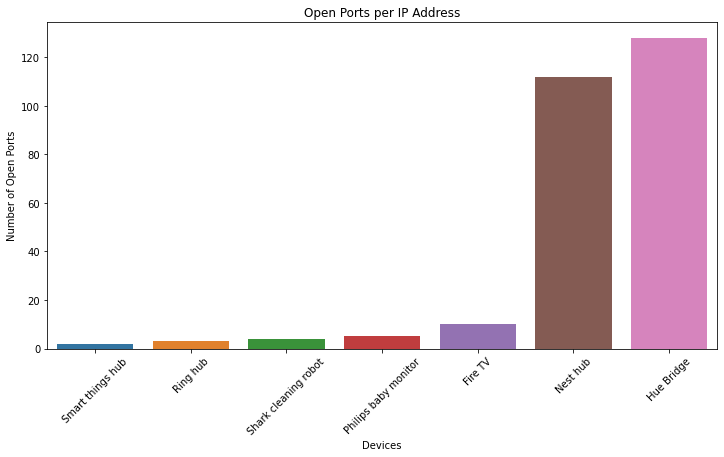

In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
# open_ports_per_ip = df[df['state'] == 'open']df[df['Device'] != 'Lab controller device'].groupby('Device')['port_id'].count()
open_ports_per_ip = df[(df['state'] == 'open') & (df['Device'] != 'Lab controller device')].groupby('Device')['port_id'].count().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=open_ports_per_ip.index, y=open_ports_per_ip.values)
plt.xlabel('Devices')
plt.ylabel('Number of Open Ports')
plt.title('Open Ports per IP Address')
plt.xticks(rotation=45)
plt.show()

In [36]:
df[df['ip_addr'] == '192.168.4.91']

,scanner,args,start_time,start_time_str,version,xmloutputversion,verbose,hosts_up,hosts_down,hosts_total,ip_addr,mac_addr,vendor,protocol,port_id,state,reason,service,version.1
0,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,5555,open,syn-ack,freeciv,unknown
1,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,Amazon Whisperplay DIAL REST service unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,8009,open,syn-ack,http,Amazon Whisperplay DIAL REST service unknown
2,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,Amazon FireTV Stick unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,34511,open,syn-ack,http,Amazon FireTV Stick unknown
3,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,35146,open,syn-ack,tcpwrapped,unknown
4,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,Nagios NSCA unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,55442,open,syn-ack,nagios-nsca,Nagios NSCA unknown
5,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,55443,open,syn-ack,unknown,unknown
6,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,Amazon FireTV Stick unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,60000,open,syn-ack,http,Amazon FireTV Stick unknown
38,nmap,nmap -oX - -p 1-1024 -sU -sV -T4 --reason --ex...,1680169713,Thu Mar 30 11:48:33 2023,unknown,1.04,1,"('8',)","('247',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,udp,151,open|filtered,no-response,hems,unknown
39,nmap,nmap -oX - -p 1-1024 -sU -sV -T4 --reason --ex...,1680169713,Thu Mar 30 11:48:33 2023,unknown,1.04,1,"('8',)","('247',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,udp,237,open|filtered,no-response,unknown,unknown
40,nmap,nmap -oX - -p 1-1024 -sU -sV -T4 --reason --ex...,1680169713,Thu Mar 30 11:48:33 2023,unknown,1.04,1,"('8',)","('247',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,udp,239,open|filtered,no-response,unknown,unknown


In [31]:
df['state'].unique()

array(['open', 'open|filtered'], dtype=object)

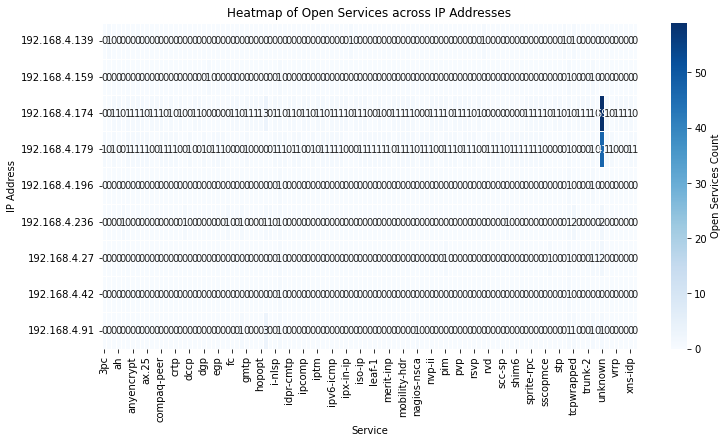

In [37]:
open_services = df[df['state'] == 'open'].pivot_table(index='ip_addr', columns='service', values='state', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(open_services, cmap="Blues", annot=True, linewidths=.5, cbar_kws={"label": "Open Services Count"})
plt.xlabel('Service')
plt.ylabel('IP Address')
plt.title('Heatmap of Open Services across IP Addresses')
plt.show()

In [59]:
# Assuming df is your DataFrame with 'state', 'service', and 'Device' columns

# Filter the DataFrame for rows with 'state' equal to 'open'
open_services = df[df['state'] == 'open']

# Group by 'Device' and 'service', count the occurrences, and normalize the result
device_service_distribution = open_services.groupby(['Device', 'service']).size().unstack(fill_value=0)
device_service_distribution = device_service_distribution.div(device_service_distribution.sum(axis=1), axis=0) * 100

# Reset the index to have 'Device' as a column
device_service_distribution.reset_index(inplace=True)

device_service_distribution


service,Device,freeciv,http,icmp,nagios-nsca,tcp,tcpwrapped,udp,unknown,a/n,...,secure-vmtp,shim6,skip,visa,xtp,X11,irc,rtsp,sun-as-jmxrmi,domain
0,Fire TV,10.0,30.00000,10.000000,10.0,10.000000,10.0,10.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,Hue Bridge,0.0,2.34375,0.781250,0.0,0.781250,0.0,0.781250,46.093750,0.781250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,Lab controller device,0.0,0.00000,12.500000,0.0,12.500000,0.0,12.500000,25.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,Nest hub,0.0,0.00000,0.892857,0.0,0.892857,0.0,0.892857,41.964286,0.892857,...,0.892857,0.892857,0.892857,0.892857,0.892857,0.0,0.0,0.0,0.0,0.0
4,Philips baby monitor,0.0,0.00000,0.000000,0.0,0.000000,20.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.0,20.0,20.0,20.0,0.0
5,Ring hub,0.0,0.00000,33.333333,0.0,33.333333,0.0,33.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,Shark cleaning robot,0.0,0.00000,25.000000,0.0,25.000000,0.0,25.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,25.0
7,Smart things hub,0.0,0.00000,50.000000,0.0,50.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [55]:
# Assuming df is your DataFrame with 'state' and 'service' columns

services_distribution = df[df['state'] == 'open'].groupby('service')['port_id'].count()

# Calculate distribution percentages
distribution_percentages = (services_distribution / services_distribution.sum()) * 100

# Create a new DataFrame with the distribution percentages
distribution_df = pd.DataFrame(distribution_percentages).reset_index()
distribution_df.columns = ['Service', 'Percentage']

# Show the new DataFrame
distribution_df

,Service,Percentage
0,3pc,0.350877
1,X11,0.350877
2,a/n,0.701754
3,ah,0.350877
4,ajp13,0.350877
...,...,...
108,vrrp,0.350877
109,wsn,0.350877
110,xnet,0.350877
111,xns-idp,0.701754


In [157]:
df_t = df[df['protocol'] == 'ip']

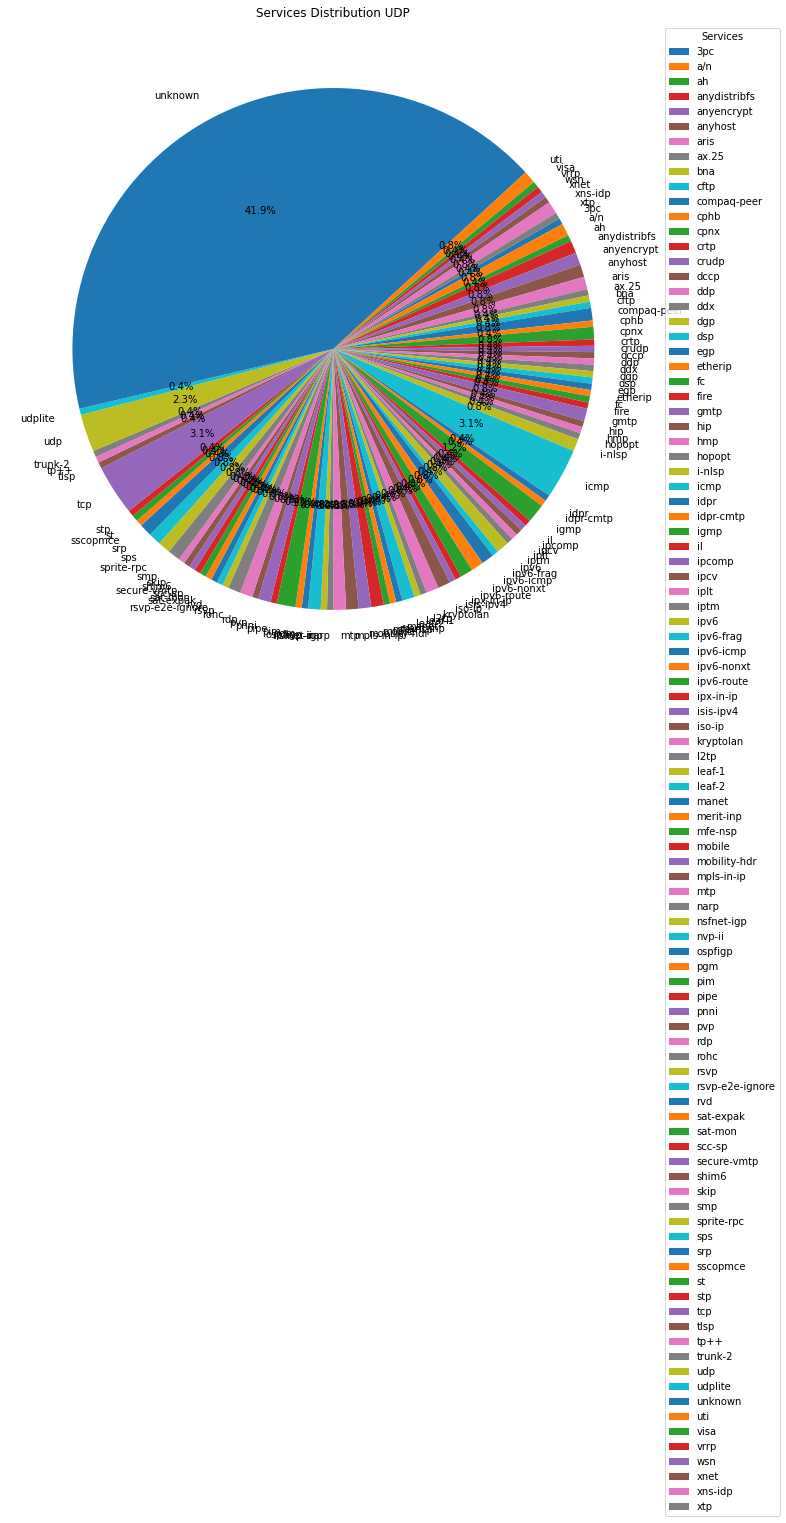

In [158]:

# Assuming df is your DataFrame with 'state' and 'service' columns

services_distribution = df_t.groupby('service')['port_id'].count()

plt.figure(figsize=(14, 12))
ax = services_distribution.plot.pie(autopct='%1.1f%%', startangle=30, counterclock=False)
plt.ylabel('')

# Use the legend function to display labels separately
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Services', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Services Distribution UDP')
plt.show()


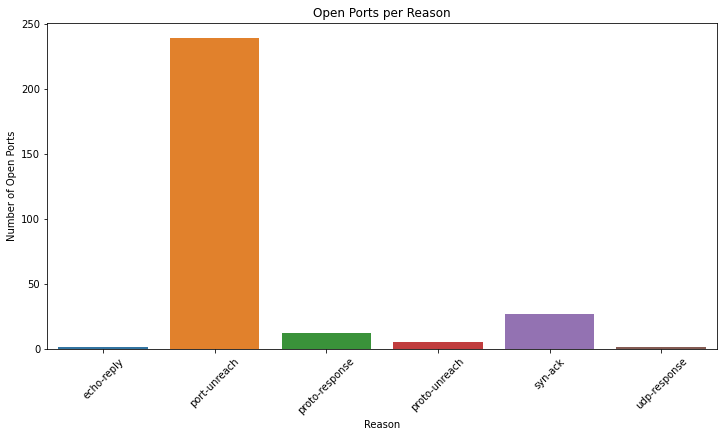

In [34]:
open_ports_reason = df[df['state'] == 'open'].groupby('reason')['port_id'].count()

plt.figure(figsize=(12, 6))
sns.barplot(x=open_ports_reason.index, y=open_ports_reason.values)
plt.xlabel('Reason')
plt.ylabel('Number of Open Ports')
plt.title('Open Ports per Reason')
plt.xticks(rotation=45)
plt.show()

In [107]:
df_nmap = df[['Device', 'protocol', 'port_id', 'state', 'reason',
       'service', 'version']]

In [170]:
df_nmap.to_csv('nmap_results.csv')

In [124]:
df_nmap

,Device,protocol,port_id,state,reason,service,version
0,Fire TV,tcp,5555,open,syn-ack,freeciv,unknown
1,Fire TV,tcp,8009,open,syn-ack,http,Amazon Whisperplay DIAL REST service unknown
2,Fire TV,tcp,34511,open,syn-ack,http,Amazon FireTV Stick unknown
3,Fire TV,tcp,35146,open,syn-ack,tcpwrapped,unknown
4,Fire TV,tcp,55442,open,syn-ack,nagios-nsca,Nagios NSCA unknown
...,...,...,...,...,...,...,...
338,Lab controller device,ip,17,open,port-unreach,udp,unknown
339,Lab controller device,ip,103,open,proto-response,pim,unknown
340,Lab controller device,ip,136,open,proto-response,udplite,unknown
341,Lab controller device,ip,235,open,proto-response,unknown,unknown


In [171]:
df_nmap[df_nmap['service'] == 'unknown']

,Device,protocol,port_id,state,reason,service,version,port_service
5,Fire TV,tcp,55443,open,syn-ack,unknown,unknown,55443:unknown
16,NaN,tcp,6466,open,syn-ack,unknown,unknown,6466:unknown
17,NaN,tcp,6467,open,syn-ack,unknown,unknown,6467:unknown
28,RPI (br0),udp,227,open|filtered,no-response,unknown,unknown,227:unknown
30,RPI (br0),udp,854,open|filtered,no-response,unknown,unknown,854:unknown
...,...,...,...,...,...,...,...,...
327,Nest hub,ip,251,open,port-unreach,unknown,unknown,251:unknown
328,Nest hub,ip,252,open,port-unreach,unknown,unknown,252:unknown
329,Nest hub,ip,255,open,port-unreach,unknown,unknown,255:unknown
341,Lab controller device,ip,235,open,proto-response,unknown,unknown,235:unknown


In [172]:
filtered_df = df_nmap[df_nmap['service'] != 'unknown']

In [173]:
filtered_df

,Device,protocol,port_id,state,reason,service,version,port_service
0,Fire TV,tcp,5555,open,syn-ack,freeciv,unknown,5555:freeciv
1,Fire TV,tcp,8009,open,syn-ack,http,Amazon Whisperplay DIAL REST service unknown,8009:http
2,Fire TV,tcp,34511,open,syn-ack,http,Amazon FireTV Stick unknown,34511:http
3,Fire TV,tcp,35146,open,syn-ack,tcpwrapped,unknown,35146:tcpwrapped
4,Fire TV,tcp,55442,open,syn-ack,nagios-nsca,Nagios NSCA unknown,55442:nagios-nsca
...,...,...,...,...,...,...,...,...
336,Lab controller device,ip,2,open|filtered,no-response,igmp,unknown,2:igmp
337,Lab controller device,ip,6,open,proto-response,tcp,unknown,6:tcp
338,Lab controller device,ip,17,open,port-unreach,udp,unknown,17:udp
339,Lab controller device,ip,103,open,proto-response,pim,unknown,103:pim


In [175]:
filtered_df['port_service'] = filtered_df.apply(lambda x: str(x['port_id']) + ':' + str(x['service']), axis=1)

/tmp/ipykernel_3291812/575314342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['port_service'] = filtered_df.apply(lambda x: str(x['port_id']) + ':' + str(x['service']), axis=1)


In [176]:
filtered_df

,Device,protocol,port_id,state,reason,service,version,port_service
0,Fire TV,tcp,5555,open,syn-ack,freeciv,unknown,5555:freeciv
1,Fire TV,tcp,8009,open,syn-ack,http,Amazon Whisperplay DIAL REST service unknown,8009:http
2,Fire TV,tcp,34511,open,syn-ack,http,Amazon FireTV Stick unknown,34511:http
3,Fire TV,tcp,35146,open,syn-ack,tcpwrapped,unknown,35146:tcpwrapped
4,Fire TV,tcp,55442,open,syn-ack,nagios-nsca,Nagios NSCA unknown,55442:nagios-nsca
...,...,...,...,...,...,...,...,...
336,Lab controller device,ip,2,open|filtered,no-response,igmp,unknown,2:igmp
337,Lab controller device,ip,6,open,proto-response,tcp,unknown,6:tcp
338,Lab controller device,ip,17,open,port-unreach,udp,unknown,17:udp
339,Lab controller device,ip,103,open,proto-response,pim,unknown,103:pim


In [177]:
pd.set_option('display.max_colwidth', None)

In [242]:
# Group by Device and protocol, then aggregate the port_id column into a list
grouped_ports = filtered_df.groupby(['protocol', 'Device']).agg({'port_service': list}).reset_index()

# Rename the aggregated column
grouped_ports.rename(columns={'port_service': 'port_service'}, inplace=True)
grouped_ports.rename(columns={'protocol': 'Scan type'}, inplace=True)

grouped_ports

,Scan type,Device,port_service
0,ip,Fire TV,"[1:icmp, 6:tcp, 17:udp]"
1,ip,Hue Bridge,"[0:hopopt, 1:icmp, 2:igmp, 5:st, 6:tcp, 11:nvp-ii, 15:xnet, 17:udp, 20:hmp, 22:xns-idp, 24:trunk-2, 26:leaf-2, 27:rdp, 31:mfe-nsp, 37:ddp, 38:idpr-cmtp, 39:tp++, 41:ipv6, 43:ipv6-route, 49:bna, 51:ah, 52:i-nlsp, 55:mobile, 56:tlsp, 58:ipv6-icmp, 59:ipv6-nonxt, 61:anyhost, 62:cftp, 65:kryptolan, 68:anydistribfs, 71:ipcv, 72:cpnx, 74:wsn, 75:pvp, 80:iso-ip, 84:iptm, 89:ospfigp, 90:sprite-rpc, 92:mtp, 99:anyencrypt, 100:gmtp, 102:pnni, 103:pim, 104:aris, 107:a/n, 108:ipcomp, 110:compaq-peer, 111:ipx-in-ip, 112:vrrp, 113:pgm, 116:ddx, 118:stp, 119:srp, 120:uti, 121:smp, 124:isis-ipv4, 125:fire, 127:crudp, 128:sscopmce, 130:sps, 133:fc, 134:rsvp-e2e-ignore, 135:mobility-hdr, 137:mpls-in-ip, 139:hip, 142:rohc]"
2,ip,Lab controller device,"[1:icmp, 2:igmp, 6:tcp, 17:udp, 103:pim, 136:udplite]"
3,ip,Nest hub,"[1:icmp, 2:igmp, 6:tcp, 8:egp, 11:nvp-ii, 17:udp, 22:xns-idp, 25:leaf-1, 26:leaf-2, 27:rdp, 32:merit-inp, 33:dccp, 34:3pc, 35:idpr, 36:xtp, 40:il, 41:ipv6, 43:ipv6-route, 44:ipv6-frag, 46:rsvp, 48:dsp, 52:i-nlsp, 54:narp, 55:mobile, 57:skip, 58:ipv6-icmp, 59:ipv6-nonxt, 61:anyhost, 64:sat-expak, 65:kryptolan, 66:rvd, 68:anydistribfs, 69:sat-mon, 70:visa, 72:cpnx, 73:cphb, 80:iso-ip, 82:secure-vmtp, 85:nsfnet-igp, 86:dgp, 90:sprite-rpc, 92:mtp, 93:ax.25, 96:scc-sp, 97:etherip, 99:anyencrypt, 100:gmtp, 102:pnni, 103:pim, 104:aris, 107:a/n, 110:compaq-peer, 115:l2tp, 119:srp, 120:uti, 121:smp, 126:crtp, 129:iplt, 130:sps, 131:pipe, 135:mobility-hdr, 137:mpls-in-ip, 138:manet, 140:shim6, 142:rohc]"
4,ip,Ring hub,"[1:icmp, 6:tcp, 17:udp]"
5,ip,Shark cleaning robot,"[1:icmp, 6:tcp, 17:udp]"
6,ip,Smart things hub,"[1:icmp, 6:tcp]"
7,tcp,Fire TV,"[5555:freeciv, 8009:http, 34511:http, 35146:tcpwrapped, 55442:nagios-nsca, 60000:http]"
8,tcp,Hue Bridge,"[80:http, 443:http, 8080:http]"
9,tcp,Lab controller device,[22:ssh]


In [244]:
gg = grouped_ports[grouped_ports["Device"].str.contains("Lab controller device")==False]

In [252]:
gg['Scan type'] = gg['Scan type'].replace('ip', 'IP Proto scan')
gg['Scan type'] = gg['Scan type'].replace('tcp', 'TCP scan')
gg['Scan type'] = gg['Scan type'].replace('udp', 'UDP scan')

/tmp/ipykernel_3291812/3226268263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gg['Scan type'] = gg['Scan type'].replace('ip', 'IP Proto scan')
/tmp/ipykernel_3291812/3226268263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gg['Scan type'] = gg['Scan type'].replace('tcp', 'TCP scan')
/tmp/ipykernel_3291812/3226268263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [255]:
gg.sort_values('Scan type', ascending=False)

,Scan type,Device,port_service
11,UDP scan,Fire TV,"[151:hems, 415:bnet, 647:dhcp-failover, 666:doom, 760:ns, 992:telnets]"
12,UDP scan,Hue Bridge,"[85:mit-ml-dev, 513:who, 559:teedtap]"
14,UDP scan,Philips baby monitor,"[184:ocserver, 258:yak-chat, 498:siam]"
15,UDP scan,RPI (br0),"[67:dhcps, 470:scx-proxy]"
16,UDP scan,Ring hub,"[67:dhcps, 270:gist, 368:qbikgdp, 379:is99c, 513:who, 519:utime, 690:vatp]"
17,UDP scan,Shark cleaning robot,"[53:domain, 67:dhcps, 111:rpcbind, 270:gist, 470:scx-proxy, 513:who, 690:vatp]"
18,UDP scan,Smart things hub,"[446:ddm-rdb, 599:acp]"
7,TCP scan,Fire TV,"[5555:freeciv, 8009:http, 34511:http, 35146:tcpwrapped, 55442:nagios-nsca, 60000:http]"
8,TCP scan,Hue Bridge,"[80:http, 443:http, 8080:http]"
10,TCP scan,Philips baby monitor,"[554:rtsp, 6000:X11, 6668:irc, 8686:sun-as-jmxrmi, 8687:tcpwrapped]"


In [169]:
# Group by Device and protocol, then aggregate the port_id column into a list
grouped_ports = df_nmap.groupby(['Device', 'protocol', 'service']).agg({'port_id': list}).reset_index()

# Rename the aggregated column
grouped_ports.rename(columns={'port_id': 'port_list'}, inplace=True)

grouped_ports
# print (grouped_ports.to_latex())

,Device,protocol,service,port_list
0,Fire TV,ip,icmp,[1]
1,Fire TV,ip,tcp,[6]
2,Fire TV,ip,udp,[17]
3,Fire TV,tcp,freeciv,[5555]
4,Fire TV,tcp,http,"[8009, 34511, 60000]"
...,...,...,...,...
196,Smart things hub,ip,icmp,[1]
197,Smart things hub,ip,tcp,[6]
198,Smart things hub,udp,acp,[599]
199,Smart things hub,udp,ddm-rdb,[446]


In [154]:
grouped_ports[grouped_ports['Device'] == 'Nest hub'].port_list

9    [1, 2, 6, 8, 11, 17, 22, 25, 26, 27, 32, 33, 34, 35, 36, 40, 41, 43, 44, 46, 48, 52, 54, 55, 57, 58, 59, 61, 64, 65, 66, 68, 69, 70, 72, 73, 80, 82, 85, 86, 90, 92, 93, 96, 97, 99, 100, 102, 103, 104, 107, 110, 115, 119, 120, 121, 126, 129, 130, 131, 135, 137, 138, 140, 142, 143, 144, 145, 146, 149, 150, 153, 158, 159, 160, 161, 166, 170, 171, 173, 174, 176, 178, 181, 182, 187, 188, 191, 192, 195, 200, 201, 204, 207, 216, 217, 227, 228, 229, 230, ...]
Name: port_list, dtype: object

## previous tries

In [22]:
merged_df_1 = pd.merge(imdea_tcp, imdea_udp, on='ip_addr', suffixes=('_tcp', '_udp'))

# Merge the resulting dataframe with imdea_ip_proto
nmap_df = pd.merge(merged_df_1, imdea_ip_proto, on='ip_addr')

# Rename the overlapping columns from the last merge
nmap_df.rename(columns=lambda x: x+'_ip_proto' if x in imdea_ip_proto.columns and x != 'ip_addr' else x, inplace=True)

In [28]:
nmap_df.columns

Index(['scanner_tcp', 'args_tcp', 'start_time_tcp', 'start_time_str_tcp',
       'version_tcp', 'xmloutputversion_tcp', 'verbose_tcp', 'hosts_up_tcp',
       'hosts_down_tcp', 'hosts_total_tcp', 'ip_addr', 'mac_addr_tcp',
       'vendor_tcp', 'protocol_tcp', 'port_id_tcp', 'state_tcp', 'reason_tcp',
       'service_tcp', 'version.1_tcp', 'scanner_udp', 'args_udp',
       'start_time_udp', 'start_time_str_udp', 'version_udp',
       'xmloutputversion_udp', 'verbose_udp', 'hosts_up_udp', 'hosts_down_udp',
       'hosts_total_udp', 'mac_addr_udp', 'vendor_udp', 'protocol_udp',
       'port_id_udp', 'state_udp', 'reason_udp', 'service_udp',
       'version.1_udp', 'scanner_ip_proto', 'args_ip_proto',
       'start_time_ip_proto', 'start_time_str_ip_proto', 'version_ip_proto',
       'xmloutputversion_ip_proto', 'verbose_ip_proto', 'hosts_up_ip_proto',
       'hosts_down_ip_proto', 'hosts_total_ip_proto', 'mac_addr_ip_proto',
       'vendor_ip_proto', 'protocol_ip_proto', 'port_id_ip_proto'

In [44]:
nmap_df = nmap_df[['ip_addr', 'mac_addr_tcp',
       'vendor_tcp', 'protocol_tcp', 'port_id_tcp', 'state_tcp', 'reason_tcp',
       'service_tcp', 'version_tcp', 'mac_addr_udp', 'vendor_udp', 'protocol_udp',
       'port_id_udp', 'state_udp', 'reason_udp', 'service_udp', 'version_udp',
       'mac_addr_ip_proto',
       'vendor_ip_proto', 'protocol_ip_proto', 'port_id_ip_proto',
       'state_ip_proto', 'reason_ip_proto', 'service_ip_proto', 'version_ip_proto'
        ]]

In [69]:
nmap_df.port_id_tcp.unique()

array([ 5555,  8009, 34511, 35146, 55442, 55443, 60000,    80,   443,
        8080,    22])

In [66]:
# tcp_state_counts = df['state_tcp'].value_counts()
# udp_state_counts = df['state_udp'].value_counts()
# ip_proto_state_counts = df['state_ip_proto'].value_counts()

# Aggregate counts for service_tcp, service_udp, and service_ip_proto
tcp_service_counts = df[df['protocol'] == 'tcp'].service.value_counts()
udp_service_counts = df[df['protocol'] == 'udp'].service.value_counts()
ip_proto_service_counts = df[df['protocol'] == 'ip'].service.value_counts()

# tcp_service_counts = df['service_tcp'].value_counts()
# udp_service_counts = df['service_udp'].value_counts()
# ip_proto_service_counts = df['service_ip_proto'].value_counts()

# # Aggregate counts for vendor_tcp, vendor_udp, and vendor_ip_proto
# tcp_vendor_counts = df['vendor_tcp'].value_counts()
# udp_vendor_counts = df['vendor_udp'].value_counts()
# ip_proto_vendor_counts = df['vendor_ip_proto'].value_counts()


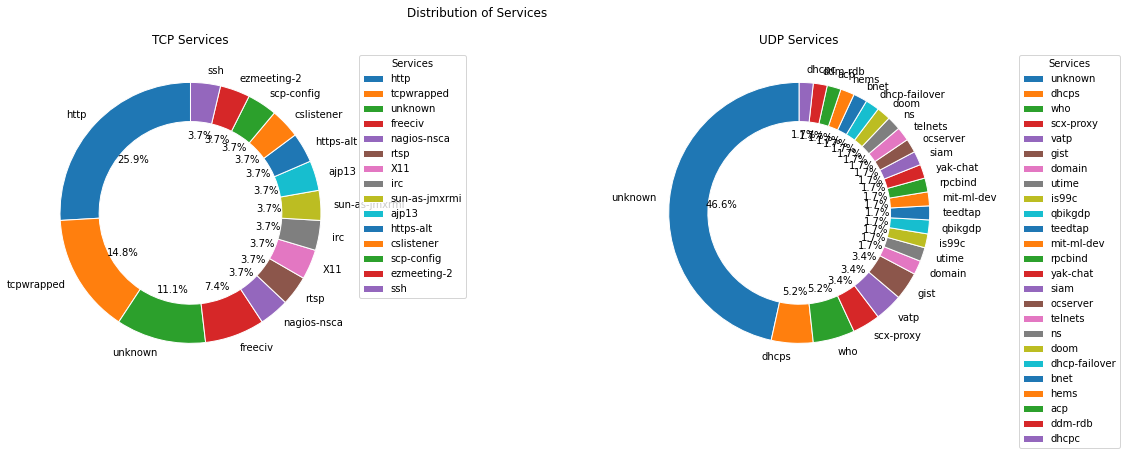

In [77]:
# Subplots for TCP, UDP, and IP_PROTO service pie charts
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# TCP Services Pie Chart
wedges, texts, autotexts = axes[0].pie(tcp_service_counts, labels=tcp_service_counts.index, autopct='%.1f%%', startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.setp(autotexts, size=10)
axes[0].set_title('TCP Services')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels, title='Services', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))


# UDP Services Pie Chart
wedges, texts, autotexts = axes[1].pie(udp_service_counts, labels=udp_service_counts.index, autopct='%.1f%%', startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.setp(autotexts, size=10)
axes[1].set_title('UDP Services')

# # IP_PROTO Services Pie Chart
# wedges, texts, autotexts = axes[2].pie(ip_proto_service_counts, labels=ip_proto_service_counts.index, autopct='%.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
# plt.setp(autotexts, size=10)
# axes[2].set_title('IP_PROTO Services')
# Use the legend function to display labels separately
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title='Services', loc='best', bbox_to_anchor=(1, 0, 0.5, 1))



plt.suptitle('Distribution of Services')
plt.show()





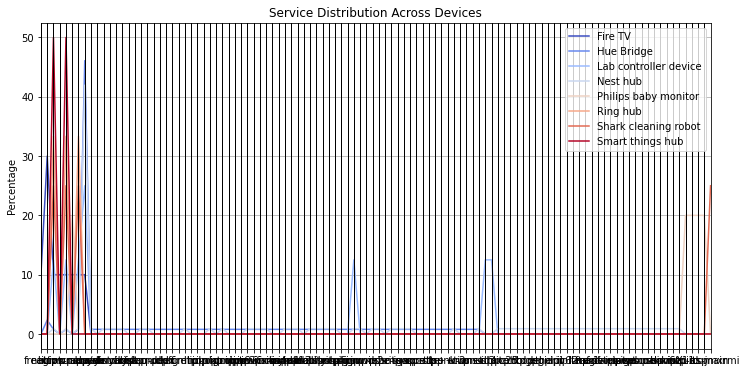

In [75]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 6))
parallel_coordinates(device_service_distribution, 'Device', colormap='coolwarm')
plt.ylabel('Percentage')
plt.title('Service Distribution Across Devices')
plt.show()

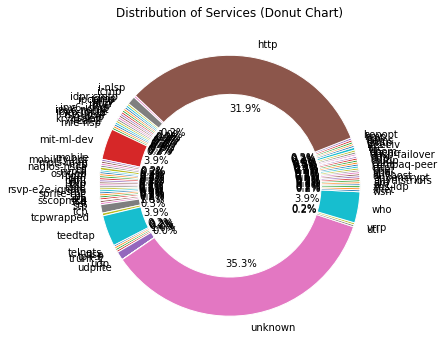

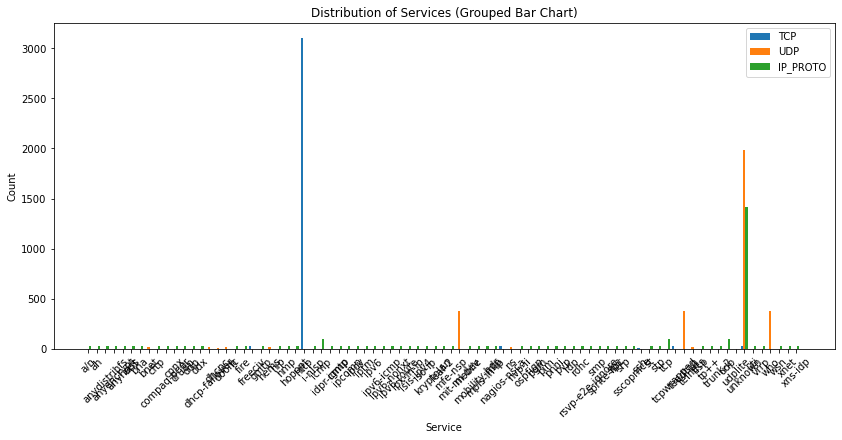

In [65]:
import numpy as np

# Donut chart for the distribution of services
plt.figure(figsize=(10, 6))
service_counts = pd.concat([tcp_service_counts, udp_service_counts, ip_proto_service_counts]).reset_index().groupby('index').sum()
wedges, texts, autotexts = plt.pie(service_counts[0], labels=service_counts.index, autopct='%.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
plt.setp(autotexts, size=10)
plt.title('Distribution of Services (Donut Chart)')
plt.show()

# Grouped bar chart for the distribution of services
service_counts_df = pd.DataFrame({'tcp': tcp_service_counts, 'udp': udp_service_counts, 'ip_proto': ip_proto_service_counts}).reset_index().rename(columns={'index': 'service'})
service_counts_df['service'] = service_counts_df['service'].astype(str)

num_categories = len(service_counts_df['service'])
x = np.arange(num_categories)

bar_width = 0.25
fig, ax = plt.subplots(figsize=(14, 6))

tcp_bars = ax.bar(x - bar_width, service_counts_df['tcp'], bar_width, label='TCP')
udp_bars = ax.bar(x, service_counts_df['udp'], bar_width, label='UDP')
ip_proto_bars = ax.bar(x + bar_width, service_counts_df['ip_proto'], bar_width, label='IP_PROTO')

ax.set_title('Distribution of Services (Grouped Bar Chart)')
ax.set_xlabel('Service')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(service_counts_df['service'])
ax.legend()
plt.xticks(rotation=45)
plt.show()


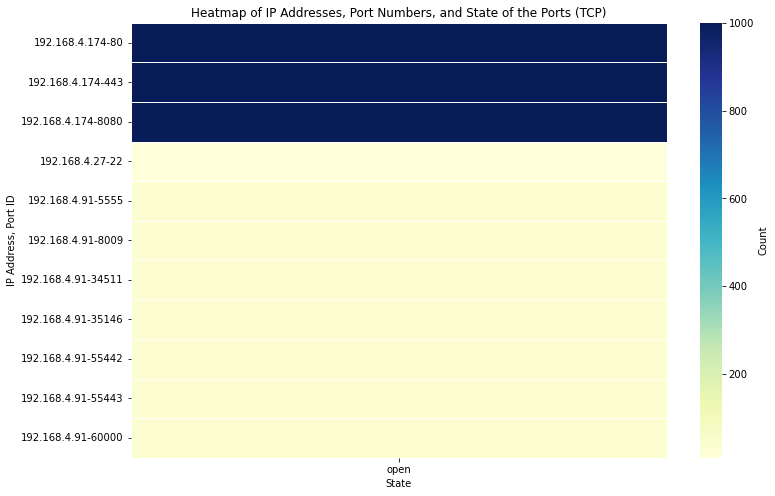

In [54]:
ip_port_state = nmap_df.groupby(['ip_addr', 'port_id_tcp', 'state_tcp']).size().unstack(level=-1).fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(ip_port_state, cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Count'})
plt.title('Heatmap of IP Addresses, Port Numbers, and State of the Ports (TCP)')
plt.ylabel('IP Address, Port ID')
plt.xlabel('State')
plt.show()

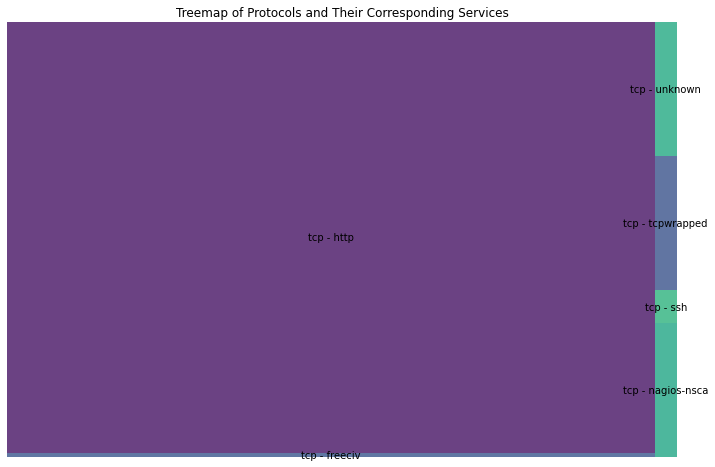

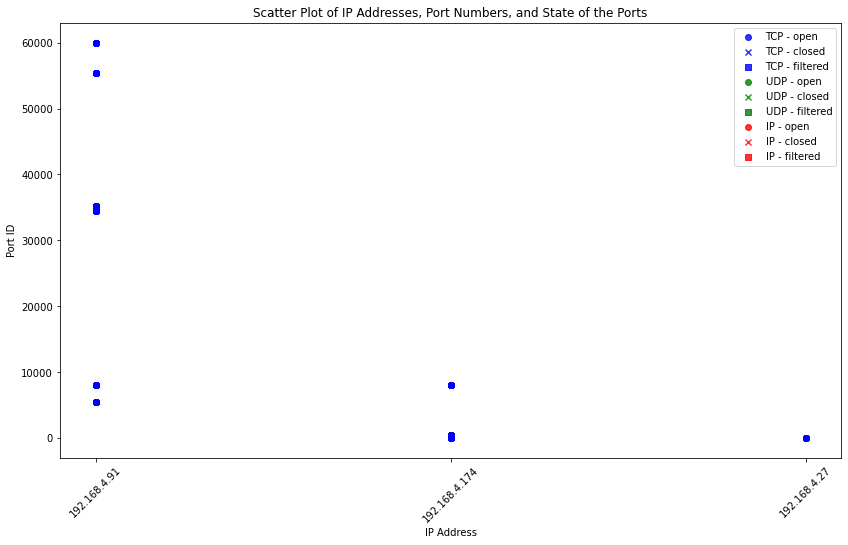

In [59]:
# 4. Treemap for protocols and their corresponding services
import squarify

protocol_service_counts = nmap_df.groupby(['protocol_tcp', 'service_tcp']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
squarify.plot(sizes=protocol_service_counts['count'], label=protocol_service_counts['protocol_tcp'] + ' - ' + protocol_service_counts['service_tcp'], alpha=0.8)
plt.axis('off')
plt.title('Treemap of Protocols and Their Corresponding Services')
plt.show()

# 5. Scatter plot for IP addresses, port numbers, and state of the ports
plt.figure(figsize=(14, 8))
markers = {'open': 'o', 'closed': 'x', 'filtered': 's'}
colors = {'tcp': 'b', 'udp': 'g', 'ip': 'r'}

for protocol, color in colors.items():
    for state, marker in markers.items():
        mask = (nmap_df['protocol_tcp'] == protocol) & (nmap_df['state_tcp'] == state)
        plt.scatter(nmap_df[mask]['ip_addr'], nmap_df[mask]['port_id_tcp'], c=color, marker=marker, label=f"{protocol.upper()} - {state}", alpha=0.8)

plt.title('Scatter Plot of IP Addresses, Port Numbers, and State of the Ports')
plt.ylabel('Port ID')
plt.xlabel('IP Address')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [90]:
df_tcp = nmap_df[['ip_addr', 'port_id_tcp', 'service_tcp']].drop_duplicates()

In [91]:
df_tcp

,ip_addr,port_id_tcp,service_tcp
0,192.168.4.91,5555,freeciv
33,192.168.4.91,8009,http
66,192.168.4.91,34511,http
99,192.168.4.91,35146,tcpwrapped
132,192.168.4.91,55442,nagios-nsca
165,192.168.4.91,55443,unknown
198,192.168.4.91,60000,http
231,192.168.4.174,80,http
1231,192.168.4.174,443,http
2231,192.168.4.174,8080,http


In [87]:
imdea_tcp[['ip_addr', 'port_id', 'service']][imdea_tcp['ip_addr'] == '192.168.4.91']

,ip_addr,port_id,service
0,192.168.4.91,5555,freeciv
1,192.168.4.91,8009,http
2,192.168.4.91,34511,http
3,192.168.4.91,35146,tcpwrapped
4,192.168.4.91,55442,nagios-nsca
5,192.168.4.91,55443,unknown
6,192.168.4.91,60000,http


In [99]:
imdea_tcp

,scanner,args,start_time,start_time_str,version,xmloutputversion,verbose,hosts_up,hosts_down,hosts_total,ip_addr,mac_addr,vendor,protocol,port_id,state,reason,service,version.1
0,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,5555,open,syn-ack,freeciv,unknown
1,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,Amazon Whisperplay DIAL REST service unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,8009,open,syn-ack,http,Amazon Whisperplay DIAL REST service unknown
2,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,Amazon FireTV Stick unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,34511,open,syn-ack,http,Amazon FireTV Stick unknown
3,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,35146,open,syn-ack,tcpwrapped,unknown
4,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,Nagios NSCA unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,55442,open,syn-ack,nagios-nsca,Nagios NSCA unknown
5,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,55443,open,syn-ack,unknown,unknown
6,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,Amazon FireTV Stick unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,60000,open,syn-ack,http,Amazon FireTV Stick unknown
7,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.139,84:7A:B6:50:AC:BD,NaN,tcp,554,open,syn-ack,rtsp,unknown
8,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.139,84:7A:B6:50:AC:BD,NaN,tcp,6000,open,syn-ack,X11,unknown
9,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.139,84:7A:B6:50:AC:BD,NaN,tcp,6668,open,syn-ack,irc,unknown


In [98]:
imdea_tcp[imdea_tcp['ip_addr'] == '192.168.4.91']

,scanner,args,start_time,start_time_str,version,xmloutputversion,verbose,hosts_up,hosts_down,hosts_total,ip_addr,mac_addr,vendor,protocol,port_id,state,reason,service,version.1
0,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,5555,open,syn-ack,freeciv,unknown
1,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,Amazon Whisperplay DIAL REST service unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,8009,open,syn-ack,http,Amazon Whisperplay DIAL REST service unknown
2,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,Amazon FireTV Stick unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,34511,open,syn-ack,http,Amazon FireTV Stick unknown
3,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,35146,open,syn-ack,tcpwrapped,unknown
4,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,Nagios NSCA unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,55442,open,syn-ack,nagios-nsca,Nagios NSCA unknown
5,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,55443,open,syn-ack,unknown,unknown
6,nmap,nmap -oX - -p 1-65535 -sS -sV -T4 --reason --e...,1680109231,Wed Mar 29 19:00:31 2023,Amazon FireTV Stick unknown,1.04,0,"('6',)","('249',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,tcp,60000,open,syn-ack,http,Amazon FireTV Stick unknown


In [103]:
imdea_udp[imdea_udp['ip_addr'] == '192.168.4.91']

,scanner,args,start_time,start_time_str,version,xmloutputversion,verbose,hosts_up,hosts_down,hosts_total,ip_addr,mac_addr,vendor,protocol,port_id,state,reason,service,version.1
11,nmap,nmap -oX - -p 1-1024 -sU -sV -T4 --reason --ex...,1680169713,Thu Mar 30 11:48:33 2023,unknown,1.04,1,"('8',)","('247',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,udp,151,open|filtered,no-response,hems,unknown
12,nmap,nmap -oX - -p 1-1024 -sU -sV -T4 --reason --ex...,1680169713,Thu Mar 30 11:48:33 2023,unknown,1.04,1,"('8',)","('247',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,udp,237,open|filtered,no-response,unknown,unknown
13,nmap,nmap -oX - -p 1-1024 -sU -sV -T4 --reason --ex...,1680169713,Thu Mar 30 11:48:33 2023,unknown,1.04,1,"('8',)","('247',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,udp,239,open|filtered,no-response,unknown,unknown
14,nmap,nmap -oX - -p 1-1024 -sU -sV -T4 --reason --ex...,1680169713,Thu Mar 30 11:48:33 2023,unknown,1.04,1,"('8',)","('247',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,udp,415,open|filtered,no-response,bnet,unknown
15,nmap,nmap -oX - -p 1-1024 -sU -sV -T4 --reason --ex...,1680169713,Thu Mar 30 11:48:33 2023,unknown,1.04,1,"('8',)","('247',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,udp,647,open|filtered,no-response,dhcp-failover,unknown
16,nmap,nmap -oX - -p 1-1024 -sU -sV -T4 --reason --ex...,1680169713,Thu Mar 30 11:48:33 2023,unknown,1.04,1,"('8',)","('247',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,udp,666,open|filtered,no-response,doom,unknown
17,nmap,nmap -oX - -p 1-1024 -sU -sV -T4 --reason --ex...,1680169713,Thu Mar 30 11:48:33 2023,unknown,1.04,1,"('8',)","('247',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,udp,760,open|filtered,no-response,ns,unknown
18,nmap,nmap -oX - -p 1-1024 -sU -sV -T4 --reason --ex...,1680169713,Thu Mar 30 11:48:33 2023,unknown,1.04,1,"('8',)","('247',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,udp,866,open|filtered,no-response,unknown,unknown
19,nmap,nmap -oX - -p 1-1024 -sU -sV -T4 --reason --ex...,1680169713,Thu Mar 30 11:48:33 2023,unknown,1.04,1,"('8',)","('247',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,udp,874,open|filtered,no-response,unknown,unknown
20,nmap,nmap -oX - -p 1-1024 -sU -sV -T4 --reason --ex...,1680169713,Thu Mar 30 11:48:33 2023,unknown,1.04,1,"('8',)","('247',)",255,192.168.4.91,40:A9:CF:7E:5C:C4,Amazon Technologies,udp,897,open|filtered,no-response,unknown,unknown


In [220]:
df = df[['Device', 'protocol', 'service', 'port_id', 'state']]

In [221]:
df_filtered = df[df["service"].str.contains("unknown")==False]

In [222]:
df_filtered

,Device,protocol,service,port_id,state
0,Fire TV,tcp,freeciv,5555,open
1,Fire TV,tcp,http,8009,open
2,Fire TV,tcp,http,34511,open
3,Fire TV,tcp,tcpwrapped,35146,open
4,Fire TV,tcp,nagios-nsca,55442,open
...,...,...,...,...,...
336,Lab controller device,ip,igmp,2,open|filtered
337,Lab controller device,ip,tcp,6,open
338,Lab controller device,ip,udp,17,open
339,Lab controller device,ip,pim,103,open


In [224]:
# Group data by IP address
ip_group = df_filtered.groupby(['Device', 'protocol'])[['port_id', 'service']].apply(lambda x: x.to_dict('records'))

# # Group data by service
# service_group = df.groupby('service')[['Device', 'port_id', 'state']].apply(lambda x: x.to_dict('records'))

# # Group data by vendor
# vendor_group = df.groupby('vendor')[['Device', 'port_id', 'state']].apply(lambda x: x.to_dict('records'))


In [225]:
ip_group

Device                 protocol
Fire TV                ip                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               